In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import geopandas as gpd
import momepy
import os

import shapely

/tmp/ipykernel_12962/2128868399.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/home/virgilxw/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqd

In [2]:
local_crs = 3414

place = "Singapore"

study_area = gpd.read_file("./Singapore_studyArea.shp").to_crs(epsg=4326)

study_area_old = study_area

# assuming your geodataframe is called `gdf` and the geometry column is called `geometry`
study_area = study_area.geometry.unary_union

In [3]:
osm_graph= ox.graph.graph_from_polygon(study_area, network_type='drive')
osm_graph = ox.projection.project_graph(osm_graph, to_crs=local_crs)

streets = ox.consolidate_intersections(osm_graph, rebuild_graph=True, tolerance=15, dead_ends=False)

streets = ox.graph_to_gdfs(
    osm_graph,
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True
)
streets.head()

osmid  \
u          v          key                                                      
25451915   25451918   0    [166741187, 649636776, 649636777, 717446235, 2...   
25451918   242636478  0                                             22617511   
           1143899970 0                                            166741192   
242636478  4656921454 0                      [37584993, 37584994, 655660141]   
1143899970 1782376557 0                                            200159288   

                           oneway      lanes  ref                    name  \
u          v          key                                                   
25451915   25451918   0      True     [4, 3]  ECP      East Coast Parkway   
25451918   242636478  0      True          1  NaN                     NaN   
           1143899970 0      True          3  ECP      East Coast Parkway   
242636478  4656921454 0      True  [2, 4, 3]  NaN  Tanah Merah Coast Road   
1143899970 1782376557 0      True          3  ECP      East Coast Parkway   

                                 highway maxspeed reversed   length bridge  \
u          v          key                                                    
25451915   25451918   0         motorway       90    False  963.113    yes   
25451918   242636478  0    motorway_link       50    False  278.409    NaN   
           1143899970 0         motorway       90    False  670.252    NaN   
242636478  4656921454 0          primary       60    False  301.106    yes   
1143899970 1782376557 0         motorway       90    False  314.233    NaN   

                                                                    geometry  \
u          v          key                                                      
25451915   25451918   0    LINESTRING (44186.853 35217.240, 44144.233 351...   
25451918   242636478  0    LINESTRING (43649.291 34422.228, 43648.779 344...   
           1143899970 0    LINESTRING (43649.291 34422.228, 43492.918 342...   
242636478  4656921454 0    LINESTRING (43724.424 34208.291, 43746.393 342...   
1143899970 1782376557 0    LINESTRING (43269.766 33872.637, 43113.671 336...   

                          access tunnel junction width  
u          v          key                               
25451915   25451918   0      NaN    NaN      NaN   NaN  
25451918   242636478  0      NaN    NaN      NaN   NaN  
           1143899970 0      NaN    NaN      NaN   NaN  
242636478  4656921454 0      yes    NaN      NaN   NaN  
1143899970 1782376557 0      NaN    NaN      NaN   NaN

In [4]:
osm_graph= ox.graph.graph_from_polygon(study_area, custom_filter='["railway"~"rail|subway|narrow_gauge|monorail"]')
osm_graph = ox.projection.project_graph(osm_graph, to_crs=local_crs)

rails = ox.consolidate_intersections(osm_graph, rebuild_graph=True, tolerance=15, dead_ends=False)

rails = ox.graph_to_gdfs(
    osm_graph,
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True
)
rails.head()

osmid   bridge    service  oneway reversed  \
u          v          key                                                   
206656323  1558637809 0    142424454  viaduct  crossover   False     True   
           1558637855 0    558669663  viaduct        NaN   False    False   
           1558637822 0    558669663  viaduct        NaN   False     True   
1558637809 1558637836 0    558669883  viaduct        NaN   False    False   
           206656323  0    142424454  viaduct  crossover   False    False   

                             length  \
u          v          key             
206656323  1558637809 0     154.540   
           1558637855 0    5672.879   
           1558637822 0     503.506   
1558637809 1558637836 0      45.852   
           206656323  0     154.540   

                                                                    geometry  \
u          v          key                                                      
206656323  1558637809 0    LINESTRING (40819.159 34476.905, 40800.607 344...   
           1558637855 0    LINESTRING (40819.159 34476.905, 40947.408 345...   
           1558637822 0    LINESTRING (40819.159 34476.905, 40759.620 344...   
1558637809 1558637836 0    LINESTRING (40677.790 34414.755, 40720.970 344...   
           206656323  0    LINESTRING (40677.790 34414.755, 40699.291 344...   

                                           ref                     name tunnel  
u          v          key                                                       
206656323  1558637809 0                    NaN                      NaN    NaN  
           1558637855 0    East West Line (EW)  MRT East West Line (EW)    NaN  
           1558637822 0    East West Line (EW)  MRT East West Line (EW)    NaN  
1558637809 1558637836 0    East West Line (EW)  MRT East West Line (EW)    NaN  
           206656323  0                    NaN                      NaN    NaN

In [5]:
waters = []

# Get the water bodies as geometries
water_bodies = ox.geometries_from_polygon(study_area, tags={'natural': 'water'}).set_crs("epsg: 4326").to_crs(local_crs)

# Explode the GeoDataFrame into a GeoSeries of polygons and multipolygons
gs = water_bodies.explode()

# Convert each polygon into a MultiLineString
mls = gs.geometry.boundary

# Convert the MultiLineString into a DataFrame
water_bodies = gpd.GeoDataFrame({'geometry': mls})

# Add a column to specify the polygon ID
water_bodies['polygon_id'] = gs.index

print(water_bodies)

for water_body in water_bodies.geometry:
    # Create a LineString object from the coordinates
    waters.append(water_body)

coastlines = ox.geometries_from_polygon(study_area, tags={'natural': 'coastline'}).set_crs("epsg: 4326").to_crs(local_crs)

coastlines = coastlines[coastlines.geom_type == "LineString"].reset_index(drop=True)

for coastline in coastlines.geometry:
    # Create a LineString object from the coordinates
    waters.append(coastline)

# # Create a GeoDataFrame of the water area boundaries
waters = gpd.GeoDataFrame(geometry=waters)
waters = waters[["geometry"]]
waters.head()

/tmp/ipykernel_12962/1800262028.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gs = water_bodies.explode()


                                                                  geometry  \
element_type osmid                                                           
way          20250182 0  LINESTRING (37698.921 36379.463, 37801.240 364...   
             20423973 0  LINESTRING (10638.104 45329.526, 10576.655 452...   
             20498763 0  LINESTRING (16251.515 32735.477, 16202.884 325...   
             22721003 0  LINESTRING (20392.301 40523.349, 20411.654 405...   
             22733434 0  LINESTRING (19219.340 37721.260, 19188.801 376...   
...                                                                    ...   
relation     15343835 0  LINESTRING (18748.719 33332.488, 18741.284 333...   
             15343837 0  LINESTRING (18497.165 32564.055, 18502.584 325...   
             15410423 0  LINESTRING (22223.387 29295.415, 22220.839 292...   
             15578756 0  LINESTRING (32275.071 39839.324, 32386.436 398...   
             15578757 0  LINESTRING (32275.071 39839.324, 32275.

,geometry
0,"LINESTRING (37698.921 36379.463, 37801.240 364..."
1,"LINESTRING (10638.104 45329.526, 10576.655 452..."
2,"LINESTRING (16251.515 32735.477, 16202.884 325..."
3,"LINESTRING (20392.301 40523.349, 20411.654 405..."
4,"LINESTRING (19219.340 37721.260, 19188.801 376..."


<Axes: >

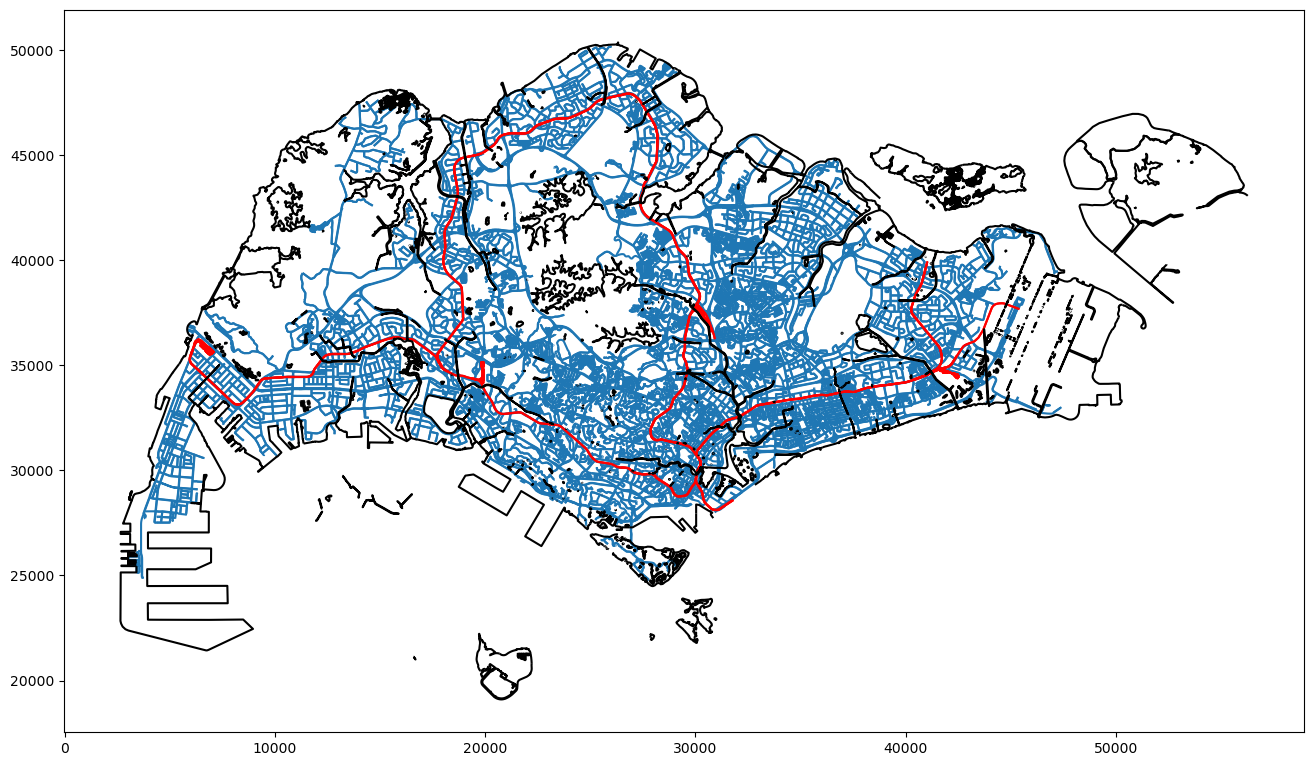

In [6]:
ax = streets.plot(figsize=(16, 16))
rails.plot(ax=ax, color='r')
waters.plot(ax=ax, color='k')

In [7]:
enclosures = momepy.enclosures(streets, limit=gpd.GeoSeries([study_area]), additional_barriers=[streets, rails, waters])

/home/virgilxw/miniconda3/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as SVY21 / Singapore TM (the single non-null crs provided).
  warnings.warn(
/home/virgilxw/miniconda3/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as SVY21 / Singapore TM (the single non-null crs provided).
  warnings.warn(
/home/virgilxw/miniconda3/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as SVY21 / Singapore TM (the single non-null crs provided).
  warnings.warn(


In [8]:
enclosure_raw = enclosures

# collapse columns into a single column
collapsed_series = enclosures.apply(lambda row: row[1], axis=1)

In [9]:
print(collapsed_series)

0        POLYGON ((103.741 1.172, 103.741 1.172, 103.74...
1        POLYGON ((103.719 1.181, 103.719 1.181, 103.71...
2        POLYGON ((103.760 1.198, 103.760 1.198, 103.76...
3        POLYGON ((103.792 1.206, 103.792 1.206, 103.79...
4        POLYGON ((103.727 1.202, 103.727 1.202, 103.72...
                               ...                        
18746    POLYGON ((43090.874 39150.083, 43083.284 39158...
18747    POLYGON ((17787.552 38173.883, 17793.795 38186...
18748    POLYGON ((17934.204 38086.612, 17929.775 38081...
18749    POLYGON ((23245.766 45460.256, 23249.137 45457...
18750    POLYGON ((23206.672 45495.530, 23231.755 45472...
Length: 18751, dtype: geometry


In [10]:
enclosures.shape# create output directory if it doesn't exist
output_dir = './out'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
gpd.GeoDataFrame(geometry=collapsed_series, crs=local_crs).to_parquet('./out/enclosures.pq')

In [26]:
# osm_graph= ox.graph.graph_from_polygon(study_area, custom_filter='["highway"~"motorway"]')
# osm_graph = ox.projection.project_graph(osm_graph, to_crs=local_crs)

# main_roads = ox.consolidate_intersections(osm_graph, rebuild_graph=True, tolerance=1000)

# main_roads = ox.graph_to_gdfs(
#     osm_graph,
#     nodes=False,
#     edges=True,
#     node_geometry=False,
#     fill_edge_geometry=True
)

In [27]:

boundaries = []

for polygon in study_area.geoms:
    # Get the boundary coordinates of the polygon
    boundary = polygon.boundary.coords[:]
    # Add the boundary coordinates to the list
    boundaries.append(shapely.geometry.LineString(boundary))

boundaries = gpd.GeoDataFrame({'geometry': boundaries}, geometry='geometry', crs=4326)

merged_gdf =  gpd.GeoDataFrame(pd.concat([boundaries.to_crs(local_crs).geometry, main_roads.geometry]), crs=local_crs)

In [28]:
merged_lines = shapely.ops.linemerge(list(merged_gdf['geometry']))
border_lines = shapely.ops.unary_union(merged_lines)
decomposition = shapely.ops.polygonize(border_lines)

In [29]:
# Create a list of tuples with the geometry and any additional attributes
records = [(geometry,) for geometry in decomposition]

# Create a new GeoDataFrame from the list of tuples
chunks = gpd.GeoDataFrame.from_records(records, columns=['geometry'])

In [30]:
print(chunks)

                                              geometry
0    POLYGON ((5868.175 36881.674, 5858.861 36888.0...
1    POLYGON ((5923.044 36835.194, 5917.985 36836.9...
2    POLYGON ((5923.044 36835.194, 5924.384 36834.7...
3    POLYGON ((5926.821 36833.857, 5924.384 36834.7...
4    POLYGON ((5873.484 36611.814, 5869.390 36627.7...
..                                                 ...
732  POLYGON ((39216.936 44190.844, 39192.314 44196...
733  POLYGON ((41263.223 42430.632, 41170.672 42522...
734  POLYGON ((48620.066 44796.315, 48651.478 44827...
735  POLYGON ((49362.640 38561.239, 49455.188 38561...
736  POLYGON ((53131.785 45952.235, 53131.788 45916...

[737 rows x 1 columns]


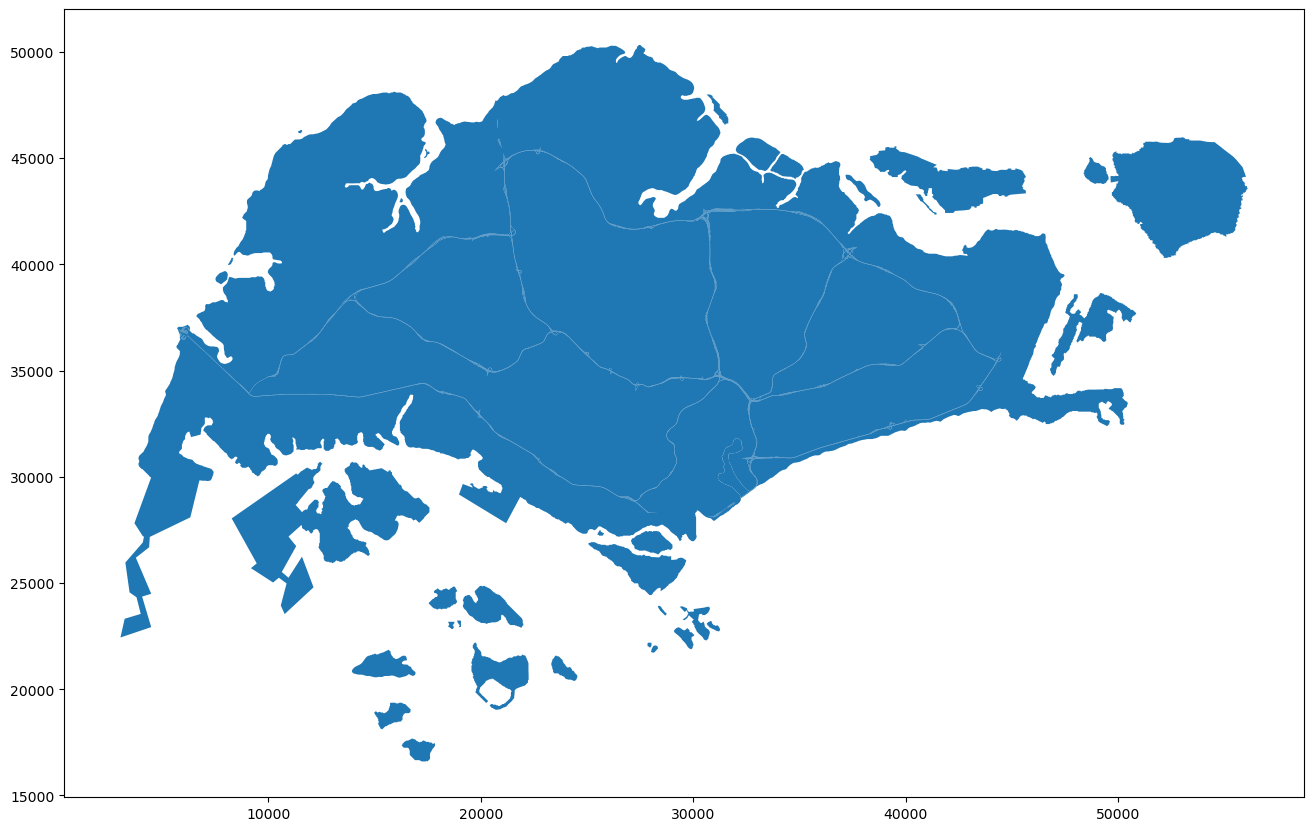

In [31]:
ax = chunks.plot(figsize=(16, 16))

In [32]:
gdf.to_parquet('./Singapore/local_authorities.pq')